An industry analyst is interested in building a predictive model to understand the impact of various factors and opening week revenue numbers in the overall collections of a movie (Total revenue). Box Office collection of bollywood movies were recorded. The data is provided in the file: MLR_Q18_MovieBoxOffice_data.csv. Link: https://drive.google.com/drive/folders/1rRbSnLml_iqwC8EeFOrEsetoov2yyHrF

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

In [2]:
# Load data
movies = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Regression-Models-main/MLR_Q18_MovieBoxOffice_data.csv')
movies.head()

,movie_name,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director,release_month,release_year
0,Angrezi Medium,9.36,4.03,9.03,9.36,Drama,145,Homi Adajania,Mar,2020
1,Baaghi 3,93.37,17.50,53.83,90.67,Action,147,Ahmed Khan,Mar,2020
2,Thappad,30.61,3.07,14.66,22.79,Drama,142,Anubhav Sinha,Feb,2020
3,Shubh Mangal Zyada Saavdhan,62.78,9.55,32.66,44.84,Comedy,120,Hitesh Kewalya,Feb,2020
4,Bhoot: Part One - The Haunted Ship,31.97,5.10,16.36,24.18,Horror,117,Bhanu Pratap Singh,Feb,2020


In [3]:
# Check the shape
movies.shape

(130, 10)

In [4]:
# Check info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_name               130 non-null    object 
 1   revenue_total            130 non-null    float64
 2   revenue_opening_day      130 non-null    float64
 3   revenue_opening_weekend  130 non-null    float64
 4   revenue_firstweek        130 non-null    float64
 5   movie_genre              130 non-null    object 
 6   runtime                  130 non-null    int64  
 7   movie_director           130 non-null    object 
 8   release_month            130 non-null    object 
 9   release_year             130 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 10.3+ KB


In [5]:
# Check correlation
X = movies[['revenue_opening_day','revenue_opening_weekend','revenue_firstweek','runtime']]
X.corr()

,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,runtime
revenue_opening_day,1.000000,0.972230,0.933651,0.514162
revenue_opening_weekend,0.972230,1.000000,0.973736,0.501872
revenue_firstweek,0.933651,0.973736,1.000000,0.493948
runtime,0.514162,0.501872,0.493948,1.000000


**revenue_opening_day is strongly correlated with revenue_opening_weekend and revenue_firstweek**<br>
**revenue_opening_weekend is strongly correlated with revenue_firstweek**

In [6]:
# Lets check correlation with Y
Y = movies['revenue_total']
X.corrwith(Y)

revenue_opening_day        0.815177
revenue_opening_weekend    0.883404
revenue_firstweek          0.948234
runtime                    0.437772
dtype: float64

**revenues generated on opening day, weekend and first week are strongly correlated with total revenue**

In [7]:
# Check for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

revenue_opening_day        33.458805
revenue_opening_weekend    91.930345
revenue_firstweek          40.067179
runtime                     2.246007
dtype: float64

In [8]:
# Lets drop revenue_opening_weekend
X.drop('revenue_opening_weekend', axis=1, inplace=True)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

revenue_opening_day    13.479281
revenue_firstweek      15.227835
runtime                 2.190267
dtype: float64

In [9]:
# VIFs came down, but still high. In order to decide which one to retain, lets train a model
Y = movies['revenue_total']
X = movies[['revenue_opening_day','revenue_firstweek']]

X = sm.add_constant(X)
model1 = sm.OLS(Y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_total   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     952.4
Date:                Wed, 25 May 2022   Prob (F-statistic):           3.47e-77
Time:                        19:07:28   Log-Likelihood:                -571.18
No. Observations:                 130   AIC:                             1148.
Df Residuals:                     127   BIC:                             1157.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7473      2.439     -1.126      0.262      -7.574       2.080
revenue_opening_day    -4.2025      0.476     -8.827      0.000      -5.145      -3.260
revenue_firstweek       2.3127      0.098     23.551      0.000       2.118       2.507
==============================================================================
Omnibus:                       76.900   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.838
Skew:                           1.833   Prob(JB):                    3.17e-144
Kurtosis:                      13.419   Cond. No.                         98.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Overall Prob(F-statistic) is significant. The p-values of the variables are also significant and hence we would retain both revenue_opening_day and revenue_firstweek when we build the final model**

In [10]:
# Lets check Categorical variable movie_genre
movies['movie_genre'].value_counts(normalize=True)*100

Comedy          25.384615
Drama           24.615385
Action          16.153846
Biographical     8.461538
Crime            4.615385
Thriller         4.615385
Horror           3.846154
Romance          3.076923
Historical       3.076923
Period           1.538462
Sports           0.769231
Dance            0.769231
Spy              0.769231
Musical          0.769231
Sci-fi           0.769231
Social           0.769231
Name: movie_genre, dtype: float64

In [11]:
# Lets replace the categories with low percentage of value counts with Others
movies['movie_genre'] =  movies['movie_genre'].replace(['Horror','Romance','Historical','Period','Sports','Dance',
                                                        'Spy','Musical','Sci-fi','Social'], 
                                                        'Others')
movies['movie_genre'].value_counts(normalize=True)*100

Comedy          25.384615
Drama           24.615385
Action          16.153846
Others          16.153846
Biographical     8.461538
Crime            4.615385
Thriller         4.615385
Name: movie_genre, dtype: float64

In [12]:
# Create dummies
genre_dummy = pd.get_dummies(movies['movie_genre'], drop_first=True)

# Merge with original data
movies = pd.concat([movies, genre_dummy], axis=1)

# Check data
movies.head()

,movie_name,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director,release_month,release_year,Biographical,Comedy,Crime,Drama,Others,Thriller
0,Angrezi Medium,9.36,4.03,9.03,9.36,Drama,145,Homi Adajania,Mar,2020,0,0,0,1,0,0
1,Baaghi 3,93.37,17.50,53.83,90.67,Action,147,Ahmed Khan,Mar,2020,0,0,0,0,0,0
2,Thappad,30.61,3.07,14.66,22.79,Drama,142,Anubhav Sinha,Feb,2020,0,0,0,1,0,0
3,Shubh Mangal Zyada Saavdhan,62.78,9.55,32.66,44.84,Comedy,120,Hitesh Kewalya,Feb,2020,0,1,0,0,0,0
4,Bhoot: Part One - The Haunted Ship,31.97,5.10,16.36,24.18,Others,117,Bhanu Pratap Singh,Feb,2020,0,0,0,0,1,0


In [13]:
# Drop the features
movies.drop(['movie_name','movie_director'], axis=1, inplace=True) #these are unique identifiers and can be dropped

movies.drop(['release_month','release_year'], axis=1, inplace=True) 
#this is not a time-series data and time related fields are not useful

# Drop the categorical variable
movies.drop('movie_genre', axis=1, inplace=True)

In [14]:
# Check data
movies.head()

,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,runtime,Biographical,Comedy,Crime,Drama,Others,Thriller
0,9.36,4.03,9.03,9.36,145,0,0,0,1,0,0
1,93.37,17.50,53.83,90.67,147,0,0,0,0,0,0
2,30.61,3.07,14.66,22.79,142,0,0,0,1,0,0
3,62.78,9.55,32.66,44.84,120,0,1,0,0,0,0
4,31.97,5.10,16.36,24.18,117,0,0,0,0,1,0


In [15]:
# Lets train the model by adding one variable at a time
Y = movies['revenue_total']
X = movies.drop('revenue_total', axis=1)

col_list = range(len(X.columns))
X = sm.add_constant(X)

for i in col_list:
    X_model = X.iloc[:,0:i+2]
    ols = sm.OLS(Y,X_model).fit()
    print("_____________________")
    print('R-SQ',ols.rsquared.round(2),'/Adj_R-SQ',ols.rsquared_adj.round(2))
    print(ols.pvalues.round(2))
    print()

ols.summary()

_____________________
R-SQ 0.66 /Adj_R-SQ 0.66
const                  0.0
revenue_opening_day    0.0
dtype: float64

_____________________
R-SQ 0.82 /Adj_R-SQ 0.81
const                      0.81
revenue_opening_day        0.00
revenue_opening_weekend    0.00
dtype: float64

_____________________
R-SQ 0.94 /Adj_R-SQ 0.94
const                      0.40
revenue_opening_day        0.00
revenue_opening_weekend    0.09
revenue_firstweek          0.00
dtype: float64

_____________________
R-SQ 0.94 /Adj_R-SQ 0.94
const                      0.98
revenue_opening_day        0.00
revenue_opening_weekend    0.09
revenue_firstweek          0.00
runtime                    0.87
dtype: float64

_____________________
R-SQ 0.94 /Adj_R-SQ 0.94
const                      0.97
revenue_opening_day        0.00
revenue_opening_weekend    0.09
revenue_firstweek          0.00
runtime                    0.86
Biographical               0.77
dtype: float64

_____________________
R-SQ 0.94 /Adj_R-SQ 0.94
const   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_total   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.53e-67
Time:                        19:07:29   Log-Likelihood:                -569.03
No. Observations:                 130   AIC:                             1160.
Df Residuals:                     119   BIC:                             1192.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0564     18.023     -0.059      0.953     -36.743      34.631
revenue_opening_day        -3.0738      0.808     -3.802      0.000      -4.674      -1.473
revenue_opening_weekend    -0.6658      0.388     -1.716      0.089      -1.434       0.103
revenue_firstweek           2.5316      0.167     15.134      0.000       2.200       2.863
runtime                    -0.0219      0.130     -0.169      0.866      -0.278       0.235
Biographical                3.4580      7.710      0.449      0.655     -11.809      18.725
Comedy                      2.1193      6.035      0.351      0.726      -9.830      14.068
Crime                       7.9896      9.735      0.821      0.413     -11.288      27.267
Drama                       1.5189      6.146      0.247      0.805     -10.651      13.688
Others                      2.2947      6.612      0.347      0.729     -10.797      15.387
Thriller                   -3.2542      9.838     -0.331      0.741     -22.735      16.227
==============================================================================
Omnibus:                       80.075   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.195
Skew:                           1.919   Prob(JB):                    1.11e-156
Kurtosis:                      13.856   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Regression Eq:**<br>
revenue_total = -1.0564 - 3.0738 * revenue_opening_day + 2.5316 * revenue_firstweek

In [16]:
# Lets use forward selection technique from mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

Y = movies['revenue_total']
X = movies.drop('revenue_total', axis=1)

lr = LinearRegression()

sfs_forward = sfs(lr,
                 k_features=(1,10),
                 forward=True,
                 floating=True,
                 scoring='neg_mean_squared_error',
                 cv=10)

sfs = sfs_forward.fit(X,Y)
print('Forward Selection Subset:', sfs.k_feature_names_)

Forward Selection Subset: ('revenue_opening_day', 'revenue_firstweek', 'Crime', 'Thriller')


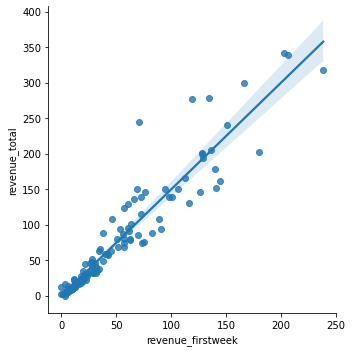

In [17]:
# Oulier detection
sns.lmplot(data=movies, x='revenue_firstweek', y='revenue_total')
plt.show()

**There are few outliers in the data**

1) Identify variables that can be used to fit a linear regression model<br>
revenue_total = -1.0564 - 3.0738 * revenue_opening_day + 2.5316 * revenue_firstweek

2) How is the total revenue impacted by genre of the movie?<br>
Genre of the movie seem to be insignificant in the model

3) Does the release month have any role to play in the movie's success?<br>
No.

4) Use any variable reduction technique to fit a model using all relevant variables.<br>
Forward Selection Subset: ('revenue_opening_day', 'revenue_firstweek', 'Crime', 'Thriller')

5) Do you find any outliers in the dataset?<br>
The lmplot between revenue_firstweek and revenue_total show the presence of outliers.